### Average Number of Years Lost For People Who Died of Coronavirus in France

We illustrate the use of the package by estimating the average number of years by which people's lives are shortened due to coronavirus. Using data from [here](https://www.data.gouv.fr/fr/datasets/donnees-de-certification-electronique-des-deces-associes-au-covid-19-cepidc/) that gives us the distribution of ages of people who died from COVID-19 in France, we find that people's lives are shortened by about 9 years on average. And that this number has not changed through the crisis.

In [ ]:
import pandas as pd
from lost_years import lost_years_hld, lost_years_ssa, lost_years_who

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(style="darkgrid")

### Prepare example input in DataFrame
Please look at country codes here:- https://www.lifetable.de/cgi-bin/country_codes.php

In [2]:
df = pd.read_csv("data/covid-cedc-quot.csv", delimiter=";")
list(df)

['reg', 'cl_age90', 'Dc_Elec_Covid_cum', 'jour']

In [3]:
df["jour"].head()

0    2020-03-06
1    2020-03-07
2    2020-03-08
3    2020-03-09
4    2020-03-10
Name: jour, dtype: object

In [4]:
df.columns = ["reg", "age", "n_deaths", "date"]
df.drop(df.loc[df.age == 0].index, inplace=True)
df

,reg,age,n_deaths,date
73,1,9,0,2020-03-06
74,1,9,0,2020-03-07
75,1,9,0,2020-03-08
76,1,9,0,2020-03-09
77,1,9,0,2020-03-10
...,...,...,...,...
16055,94,90,0,2020-05-13
16056,94,90,0,2020-05-14
16057,94,90,0,2020-05-15
16058,94,90,0,2020-05-16


In [5]:
df2 = df.groupby(["date", "age"]).agg({"n_deaths": sum})
df2

n_deaths
date       age          
2020-03-06 9           0
           19          0
           29          0
           39          0
           49          0
...                  ...
2020-05-17 59        400
           69       1021
           79       2060
           89       3966
           90       2645

[730 rows x 1 columns]

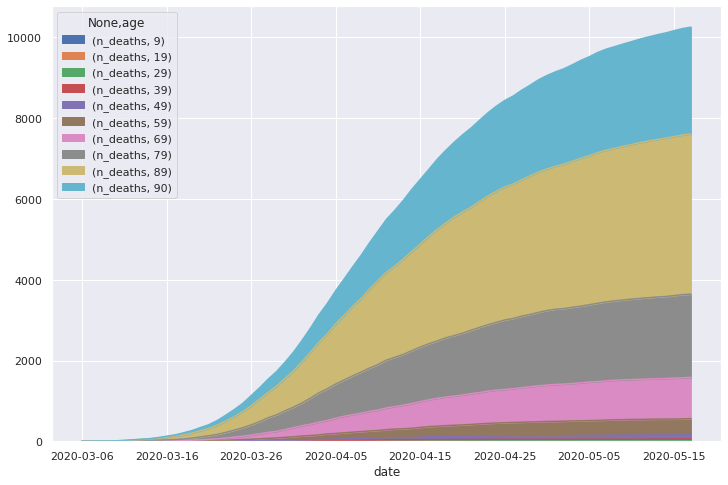

In [6]:
df2.unstack().plot(kind="area", stacked=True, figsize=(12, 8))

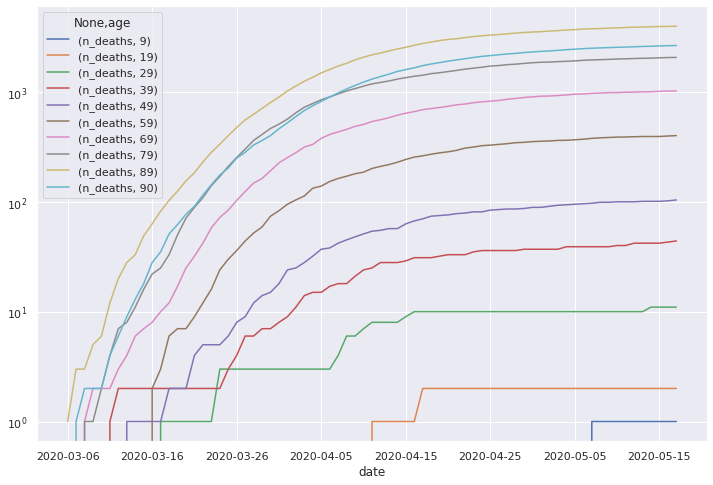

In [7]:
df2.unstack().plot(logy=True, figsize=(12, 8))

In [8]:
df2.reset_index(inplace=True)
df2

,date,age,n_deaths
0,2020-03-06,9,0
1,2020-03-06,19,0
2,2020-03-06,29,0
3,2020-03-06,39,0
4,2020-03-06,49,0
...,...,...,...
725,2020-05-17,59,400
726,2020-05-17,69,1021
727,2020-05-17,79,2060
728,2020-05-17,89,3966


In [9]:
df2["year"] = 2020
df2["country"] = "FRA"
df2["sex"] = "M"

In [10]:
df2

,date,age,n_deaths,year,country,sex
0,2020-03-06,9,0,2020,FRA,M
1,2020-03-06,19,0,2020,FRA,M
2,2020-03-06,29,0,2020,FRA,M
3,2020-03-06,39,0,2020,FRA,M
4,2020-03-06,49,0,2020,FRA,M
...,...,...,...,...,...,...
725,2020-05-17,59,400,2020,FRA,M
726,2020-05-17,69,1021,2020,FRA,M
727,2020-05-17,79,2060,2020,FRA,M
728,2020-05-17,89,3966,2020,FRA,M


In [11]:
fr_ldf = lost_years_who(df2, {"age": "age", "country": "country", "sex": "sex", "year": "year"})
fr_ldf.head()

,date,age,n_deaths,year,country,sex,who_age,who_country,who_life_expectancy,who_sex,who_year
0,2020-03-06,9,0,2020,FRA,M,10,FRA,70.5,MLE,2016
1,2020-03-06,19,0,2020,FRA,M,20,FRA,60.6,MLE,2016
2,2020-03-06,29,0,2020,FRA,M,30,FRA,50.9,MLE,2016
3,2020-03-06,39,0,2020,FRA,M,40,FRA,41.3,MLE,2016
4,2020-03-06,49,0,2020,FRA,M,50,FRA,32.1,MLE,2016


In [12]:
gldf = fr_ldf.groupby(["date", "age", "who_life_expectancy"]).agg({"n_deaths": sum})
gldf

n_deaths
date       age who_life_expectancy          
2020-03-06 9   70.5                        0
           19  60.6                        0
           29  50.9                        0
           39  41.3                        0
           49  32.1                        0
...                                      ...
2020-05-17 59  23.8                      400
           69  16.2                     1021
           79  9.4                      2060
           89  6.7                      3966
           90  6.7                      2645

[730 rows x 1 columns]

In [13]:
gldf.reset_index(inplace=True)
gldf

,date,age,who_life_expectancy,n_deaths
0,2020-03-06,9,70.5,0
1,2020-03-06,19,60.6,0
2,2020-03-06,29,50.9,0
3,2020-03-06,39,41.3,0
4,2020-03-06,49,32.1,0
...,...,...,...,...
725,2020-05-17,59,23.8,400
726,2020-05-17,69,16.2,1021
727,2020-05-17,79,9.4,2060
728,2020-05-17,89,6.7,3966


In [14]:
gldf["years_lost"] = gldf["who_life_expectancy"] * gldf["n_deaths"]
gldf

,date,age,who_life_expectancy,n_deaths,years_lost
0,2020-03-06,9,70.5,0,0.0
1,2020-03-06,19,60.6,0,0.0
2,2020-03-06,29,50.9,0,0.0
3,2020-03-06,39,41.3,0,0.0
4,2020-03-06,49,32.1,0,0.0
...,...,...,...,...,...
725,2020-05-17,59,23.8,400,9520.0
726,2020-05-17,69,16.2,1021,16540.2
727,2020-05-17,79,9.4,2060,19364.0
728,2020-05-17,89,6.7,3966,26572.2


In [15]:
gldf2 = gldf.groupby(["date"]).agg({"years_lost": sum})
gldf2

,years_lost
date,
2020-03-06,6.7
2020-03-07,26.8
2020-03-08,59.1
2020-03-09,88.7
2020-03-10,104.8
...,...
2020-05-13,93752.9
2020-05-14,94148.7
2020-05-15,94637.7


In [16]:
gldf2 = gldf2.join(fr_ldf.groupby(["date"]).agg({"n_deaths": sum}))
gldf2["avg_years_lost"] = gldf2.years_lost / gldf2.n_deaths
gldf2

,years_lost,n_deaths,avg_years_lost
date,,,
2020-03-06,6.7,1,6.700000
2020-03-07,26.8,4,6.700000
2020-03-08,59.1,7,8.442857
2020-03-09,88.7,10,8.870000
2020-03-10,104.8,12,8.733333
...,...,...,...
2020-05-13,93752.9,10064,9.315670
2020-05-14,94148.7,10109,9.313354
2020-05-15,94637.7,10165,9.310152


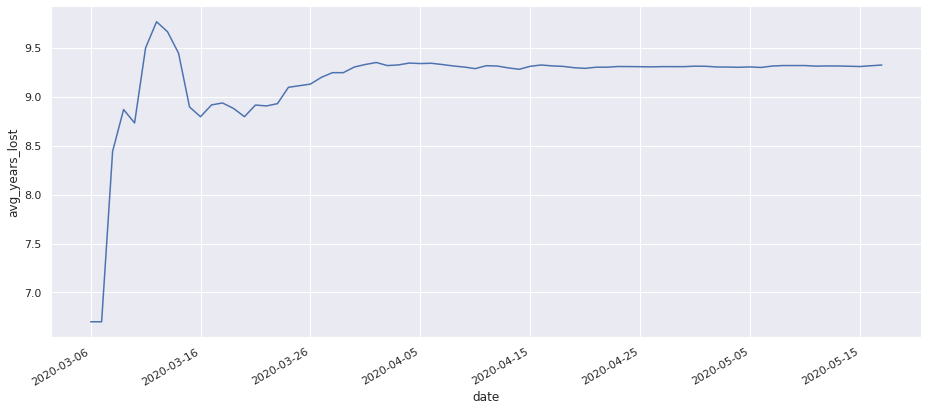

In [17]:
g = sns.relplot(x="date", y="avg_years_lost", kind="line", data=gldf2.reset_index())
g.fig.autofmt_xdate()
g.fig.set_figwidth(16)
g.fig.set_figheight(6)
for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))